## Kullback Leibler Divergence in Python
https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810

In [2]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
# import tensorflow as tf
import torch
import seaborn as sns
sns.set()

KL-Divergence deals not with actual observations but the probability distributions of the random variables themselves.  
Does the probability distribution approximated by $q(x)$ well cover the actual probability distribution of $p(x)$?   
  
In the formula below, it is not the actual values of x that is included, but the __probabilities__ along x that is inputted. 

In [5]:
def kl_divergence(p, q):
    """
    Calculates the kullback leibler divergence
    
    p, q: (np.array) containing the probabilities of x
    """
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

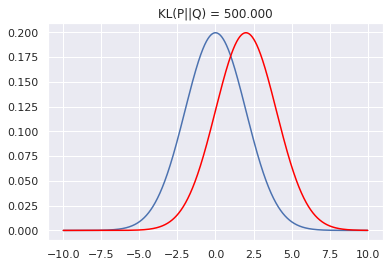

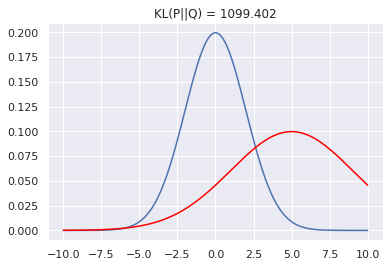

In [14]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)

plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')
plt.show()  

"""
Changing Q to be more erroneous
"""

q = norm.pdf(x, 5, 4)

plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')
plt.show();

### KL can be used to fit distributions by gradient descent. 

In [157]:
x = np.arange(-10, 10, 0.001)
p_pdf = norm.pdf(x, 0, 2).reshape(1, -1)
np.random.seed(0)
random_mean = np.random.randint(10, size=1)
random_sigma = np.random.randint(1,10, size=1)
p = norm.pdf(x, random_mean, random_sigma)#.reshape(1, -1)
p = torch.Tensor(p)

learning_rate = 0.01
epochs = 100

In [158]:
print(f"mean: {random_mean}")
print(f"stf: {random_sigma}")

mean: [5]
stf: [1]


In [149]:
class normal_dist(torch.nn.Module):
    def __init__(self):
        super(normal_dist, self).__init__()
        self.mu = torch.nn.Parameter(torch.Tensor([0.0]))
        self.sigma = torch.nn.Parameter(torch.Tensor([1.0]))
    def forward(self, p):
        normal = torch.exp( torch.pow((torch.Tensor(x)-self.mu), 2) / (2 * self.sigma) )
        q = normal / normal.sum()
        return  torch.nn.functional.kl_div(p,q)
        kld = torch.where(torch.Tensor(p/q)==0, p*torch.log(p/q), torch.zeros(p.size()))
        return kld
    
model = normal_dist()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [170]:
for i in range(100):
    optimizer.zero_grad()
    loss = model(p)
    loss.backward()
    optimizer.step()

In [171]:
model.mu

Parameter containing:
tensor([0.0004], requires_grad=True)

its gradually increasing...